In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From github.com:mwalmsley/zoobot
   16e79d0..b50d763  al-iter    -> origin/al-iter
Updating 16e79d0..b50d763
Fast-forward
 zoobot/active_learning/simulation_timeline.py | 4 ----
 1 file changed, 4 deletions(-)


In [ ]:
import json
import ast
import itertools
import os
import argparse
import pickle

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set()
from zoobot.estimators import input_utils
from zoobot.active_learning import metrics, simulation_timeline, analysis

from zoobot.tfrecord import read_tfrecord
from zoobot.tests import TEST_FIGURE_DIR

### Configuration

In [3]:
initial = 6000
per_iter = 3072
catalog_loc = 'data/panoptes_predictions_selected.csv'
baseline_dir = 'data/runs/al_baseline'
active_dir = 'data/runs/al_mutual'
output_dir = 'results/latest_metrics'


In [4]:
title = 'Initial: {}. Per iter: {}. From scratch.'.format(initial, per_iter)
name = '{}init_{}per'.format(initial, per_iter)

# will be re-used for subject history of baseline, if provided
n_subjects = 15
size = 128
channels = 3

In [5]:
catalog = pd.read_csv(catalog_loc)
catalog_cols = ['ra', 'dec', 'smooth-or-featured_smooth_fraction']

### Active Mode

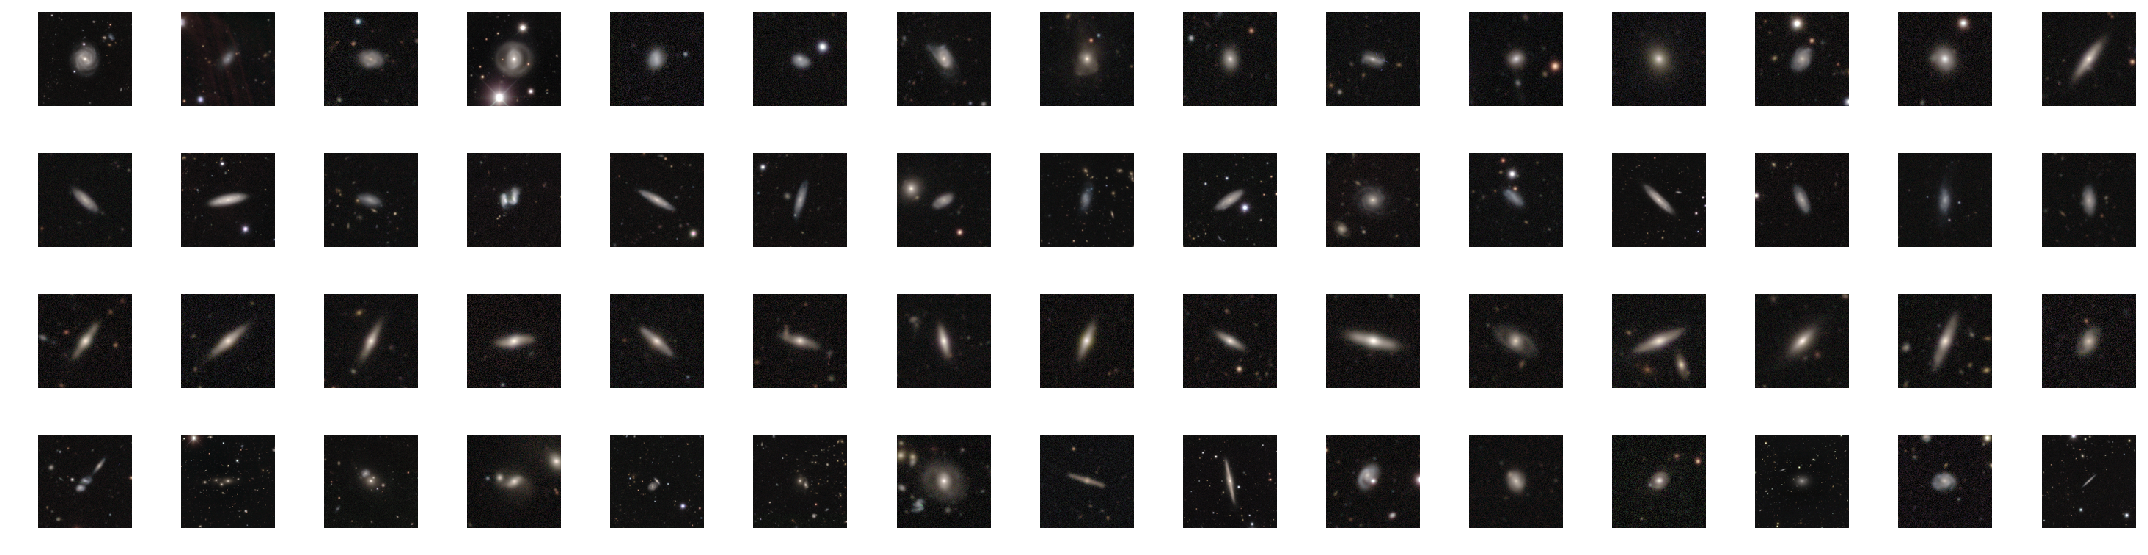

In [16]:
active_train_locs = analysis.get_final_train_locs(active_dir)
analysis.show_subjects_by_iteration(active_train_locs, n_subjects, size, channels, os.path.join(output_dir, 'subject_history_active.png'))

In [19]:
active_iteration_dirs = analysis.get_iteration_dirs(active_dir)
active_states = [metrics.load_iteration_state(iteration_dir) for iteration_dir in active_iteration_dirs]
active_timeline = simulation_timeline.Timeline(active_states, catalog, per_iter, output_dir) 

/home/ubuntu/root/zoobot/zoobot/active_learning/simulated_metrics.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  filtered_catalog['subject_id'] = filtered_catalog['subject_id'].astype(str)


/home/ubuntu/root/zoobot/zoobot/active_learning/simulation_timeline.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/anacon

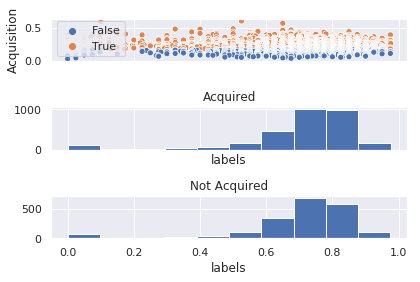

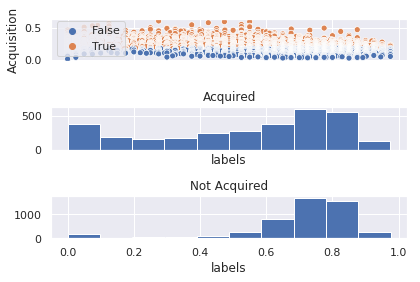

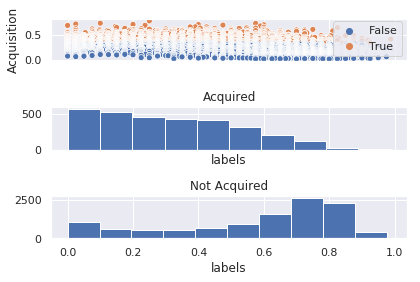

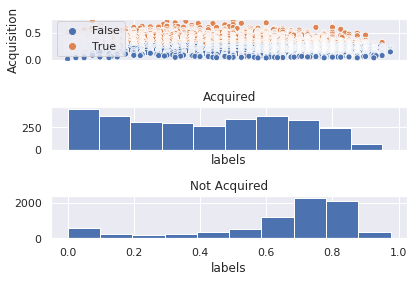

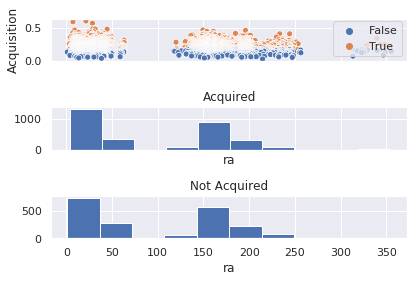

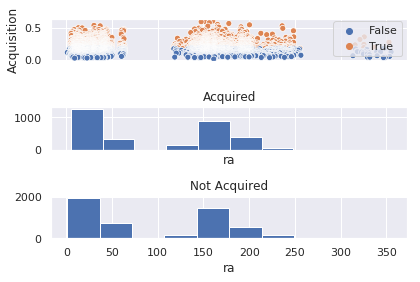

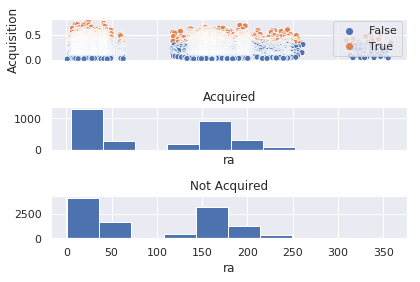

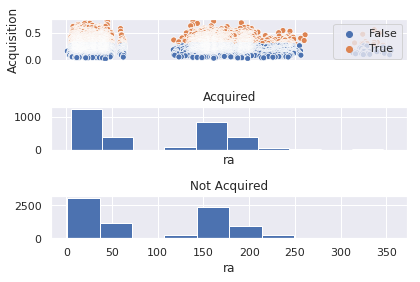

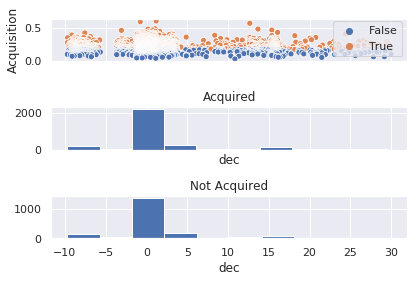

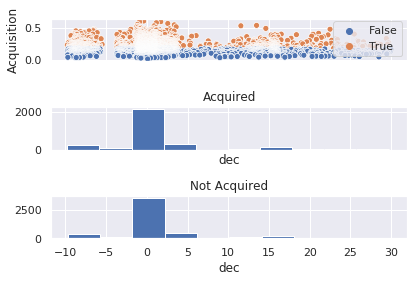

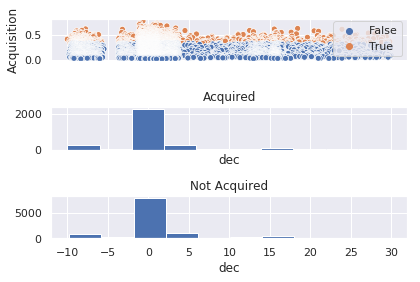

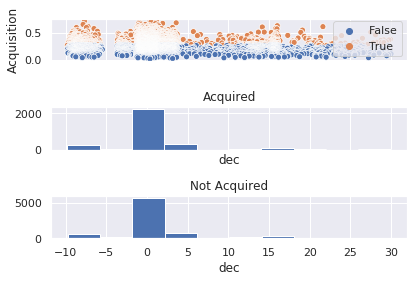

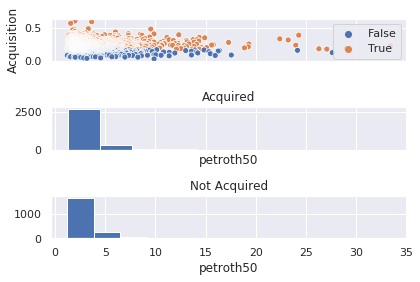

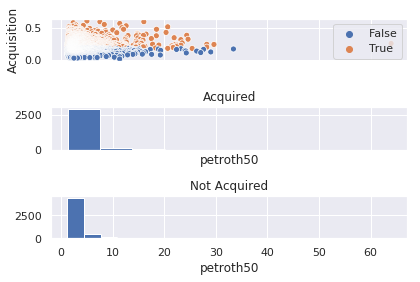

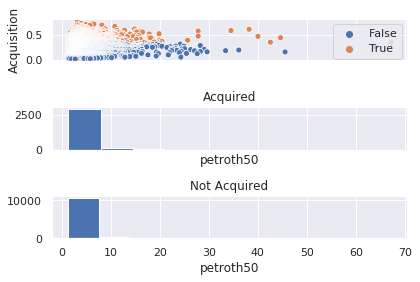

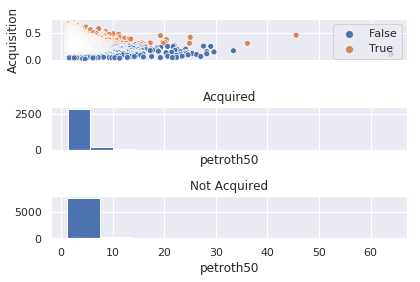

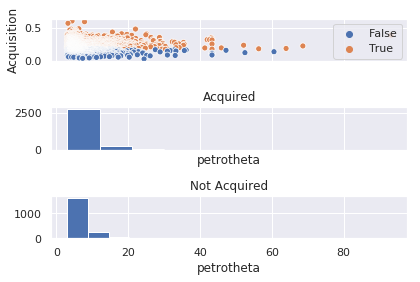

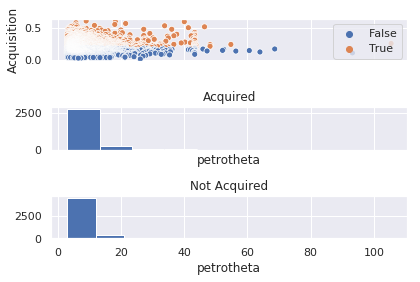

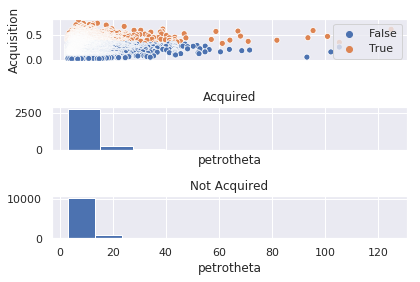

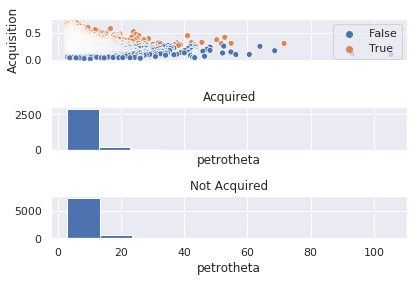

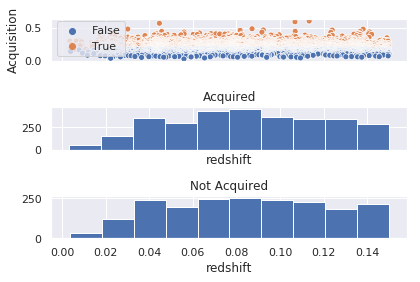

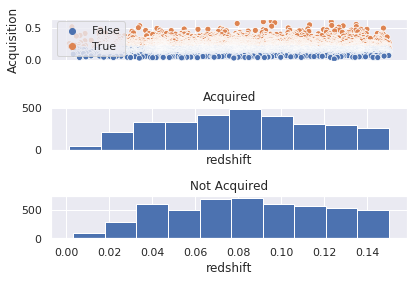

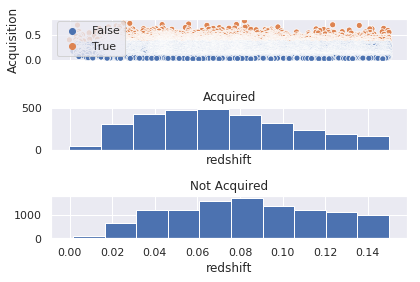

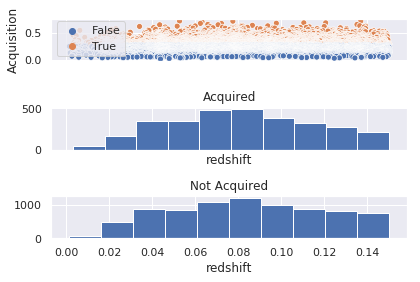

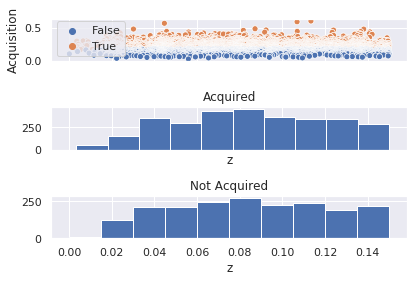

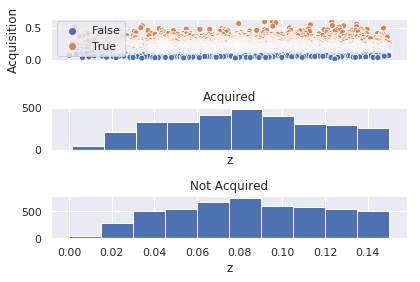

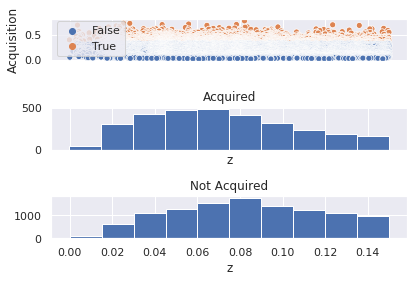

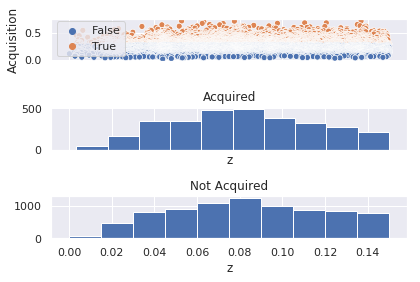

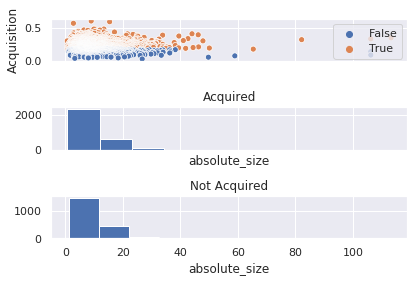

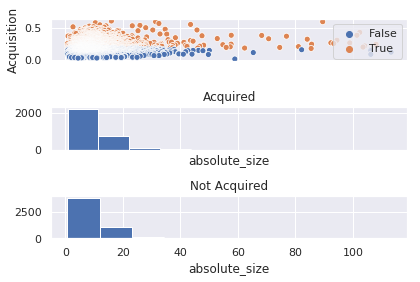

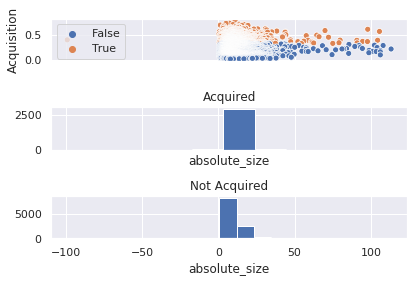

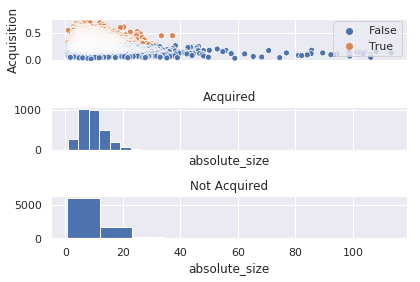

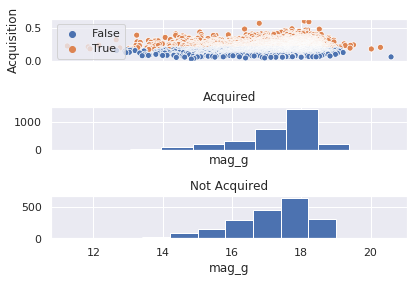

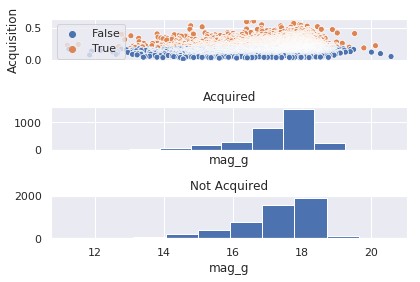

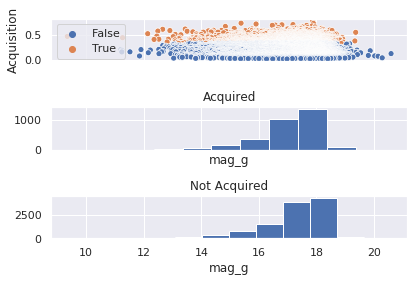

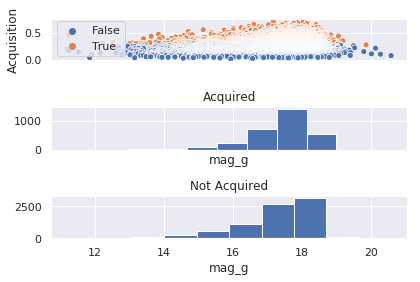

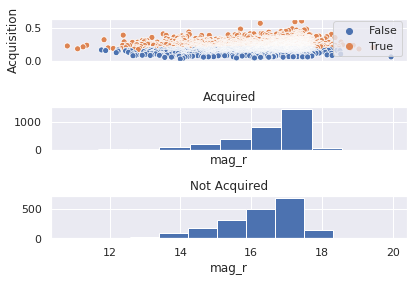

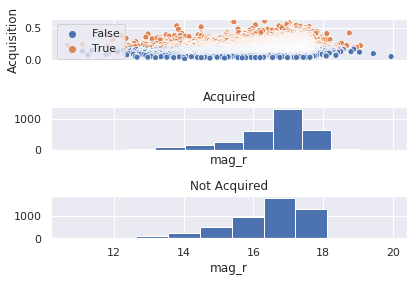

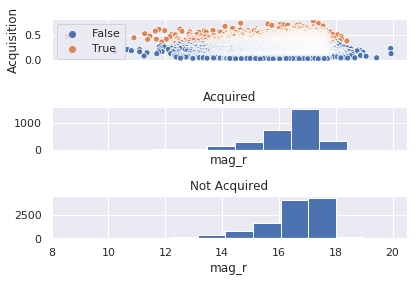

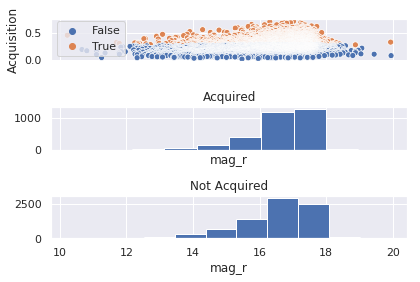

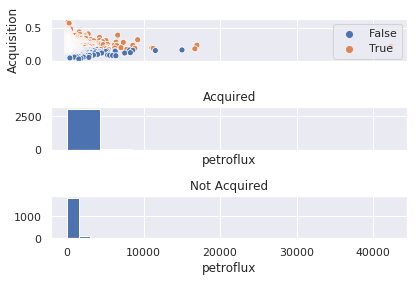

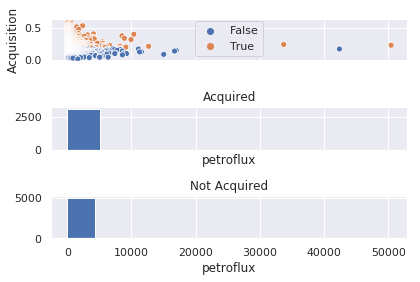

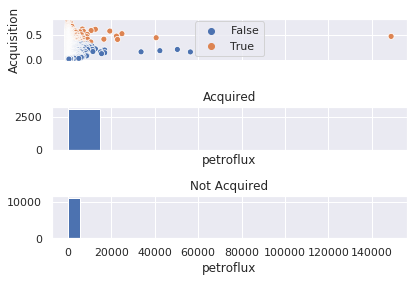

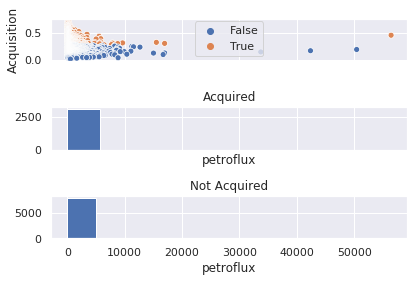

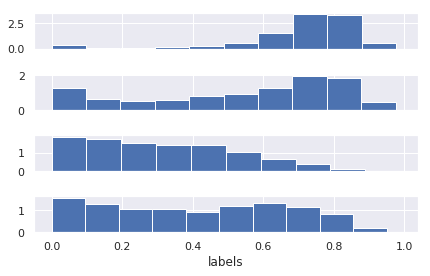

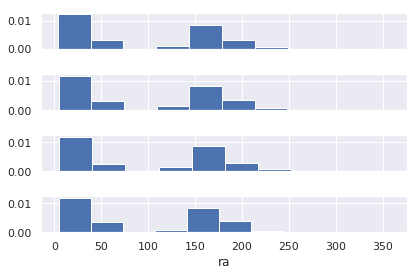

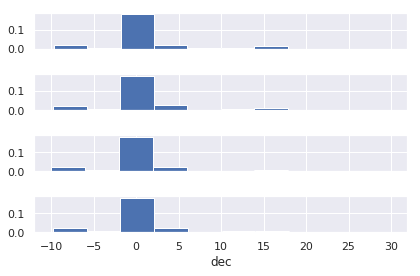

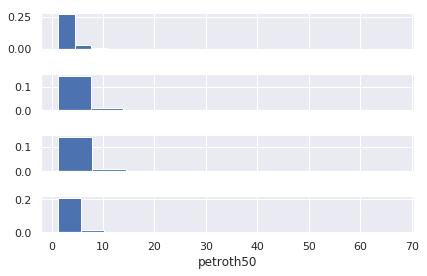

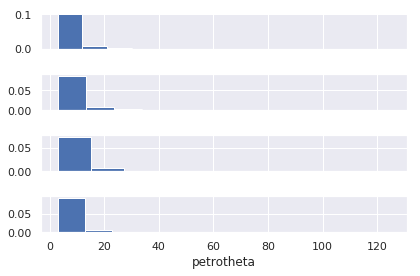

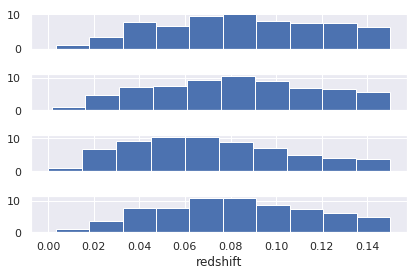

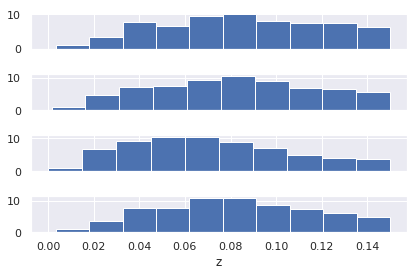

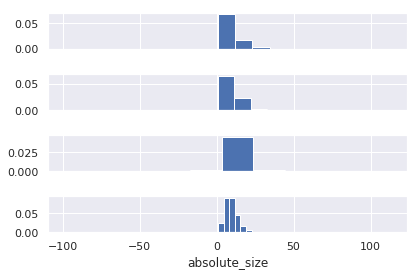

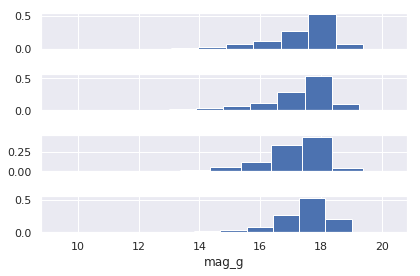

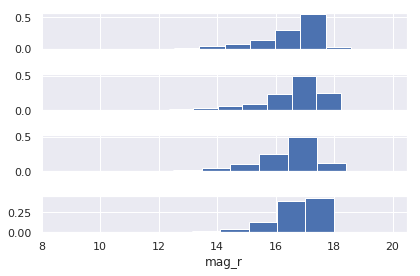

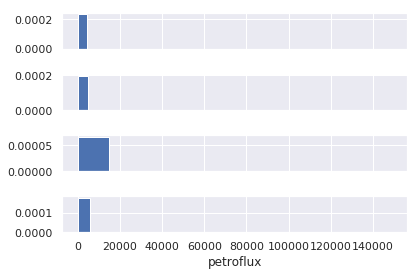

In [22]:
active_timeline.save_acquistion_comparison()
active_timeline.save_model_histograms()

/home/ubuntu/root/zoobot/zoobot/active_learning/analysis.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['smoothed_loss'] = smoothed_metrics[:, 1]
/home/ubuntu/root/zoobot/zoobot/active_learning/analysis.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['name'] = name  # record baseline vs active, for example


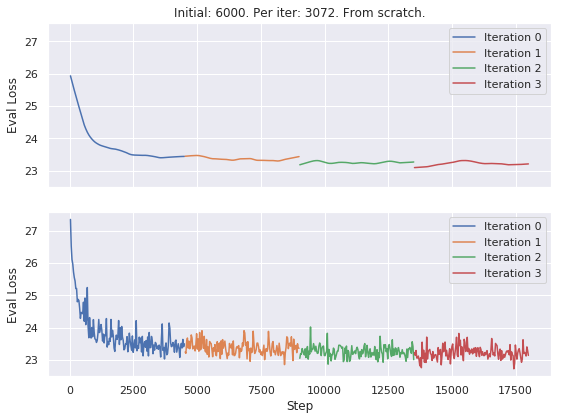

In [26]:
active_log_loc = analysis.find_log(active_dir)
active_save_loc = os.path.join(output_dir, 'acc_metrics_active_' + name + '.png')
    
active_smooth_metrics = analysis.get_smooth_metrics_from_log(active_log_loc, name='active')
analysis.plot_log_metrics(active_smooth_metrics, active_save_loc, title=title)

/home/ubuntu/root/zoobot/zoobot/active_learning/analysis.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['smoothed_loss'] = smoothed_metrics[:, 1]
/home/ubuntu/root/zoobot/zoobot/active_learning/analysis.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['name'] = name  # record baseline vs active, for example


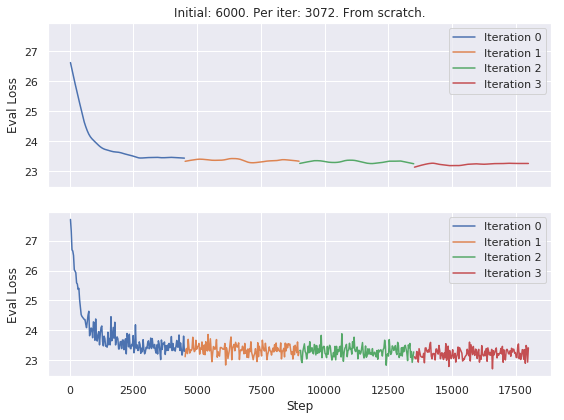

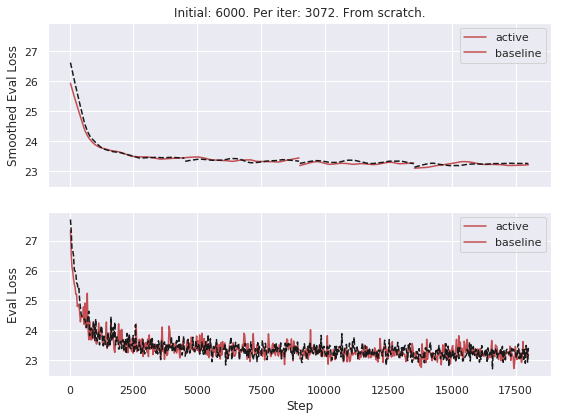

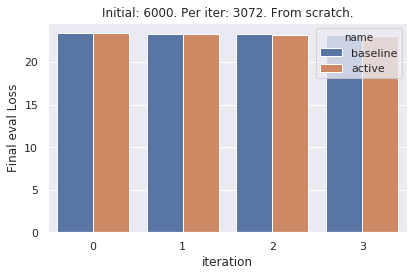

In [31]:
baseline_log_loc = analysis.find_log(baseline_dir)
baseline_save_loc = os.path.join(output_dir, 'acc_metrics_baseline_' + name + '.png')
baseline_smooth_metrics = analysis.get_smooth_metrics_from_log(baseline_log_loc, name='baseline')
analysis.plot_log_metrics(baseline_smooth_metrics, baseline_save_loc, title=title)

comparison_save_loc = os.path.join(output_dir, 'loss_comparison_' + name + '.png')
analysis.compare_loss_over_time(active_smooth_metrics, baseline_smooth_metrics, comparison_save_loc, title=title)

best_result_save_loc = os.path.join(output_dir, 'loss_best_results_' + name + '.png')
analysis.compare_metrics(baseline_smooth_metrics + active_smooth_metrics, best_result_save_loc, title=title)

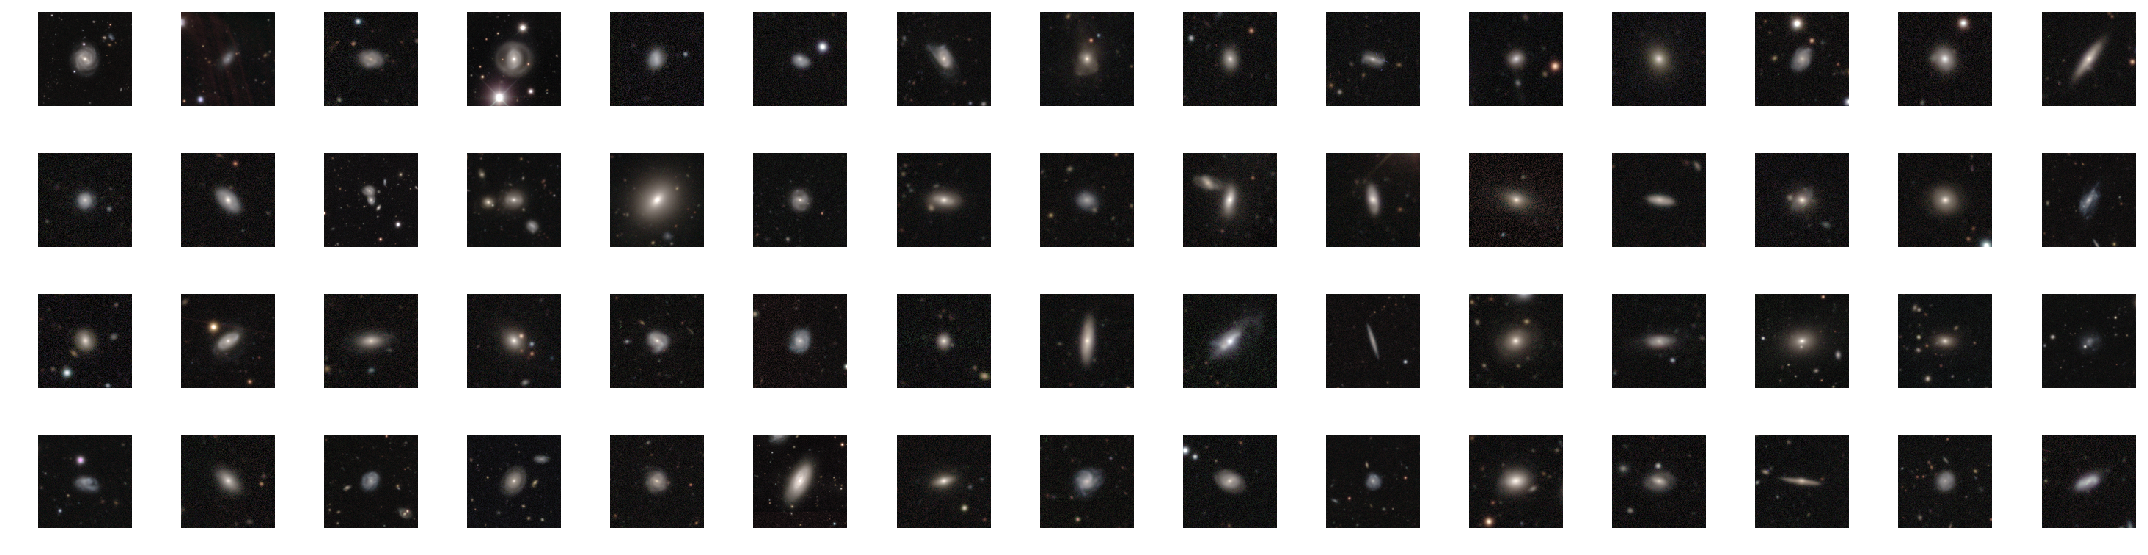

In [35]:
baseline_train_locs = analysis.get_final_train_locs(baseline_dir)
analysis.show_subjects_by_iteration(baseline_train_locs, n_subjects, size, channels, os.path.join(output_dir, 'subject_history_baseline.png'))

In [39]:
baseline_iteration_dirs = analysis.get_iteration_dirs(baseline_dir)
baseline_states = [metrics.load_iteration_state(iteration_dir) for iteration_dir in baseline_iteration_dirs]
os.mkdir(os.path.join(output_dir, 'baseline'))
baseline_timeline = simulation_timeline.Timeline(baseline_states, catalog, per_iter, os.path.join(output_dir, 'baseline'))

/home/ubuntu/root/zoobot/zoobot/active_learning/simulated_metrics.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  filtered_catalog['subject_id'] = filtered_catalog['subject_id'].astype(str)


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


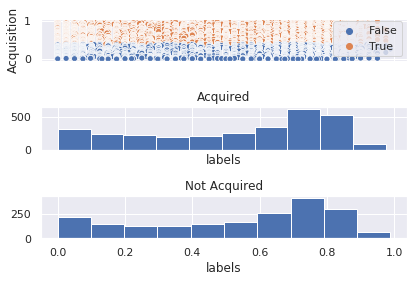

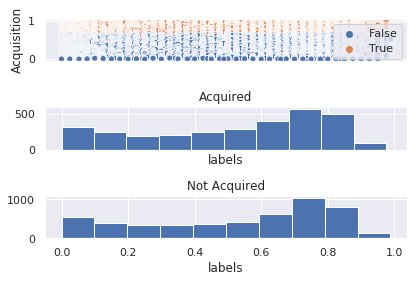

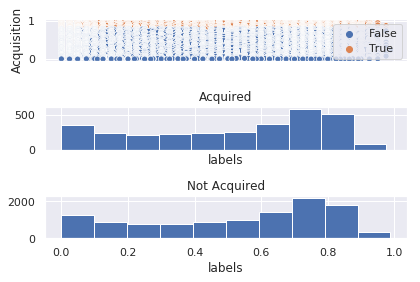

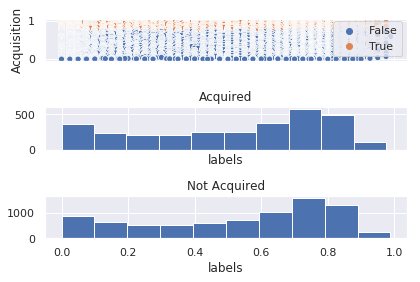

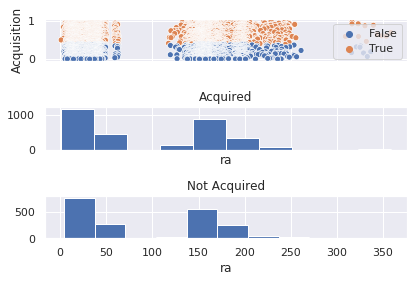

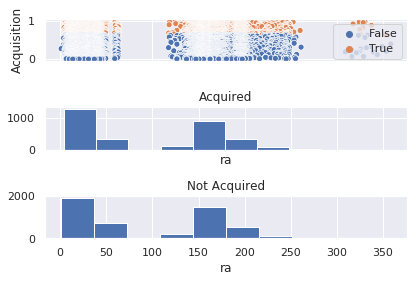

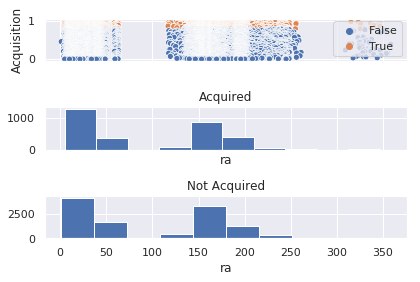

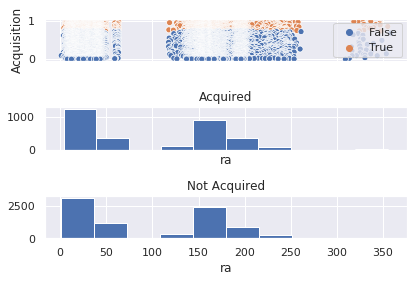

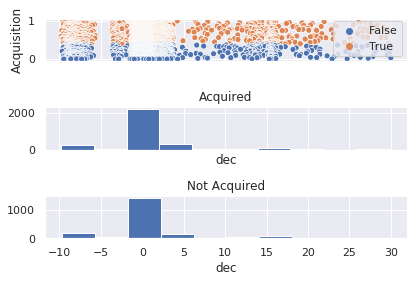

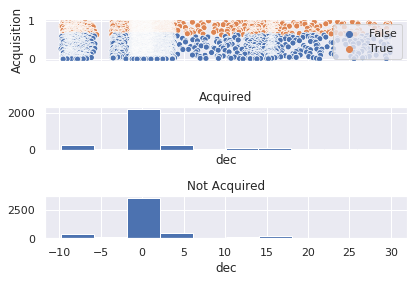

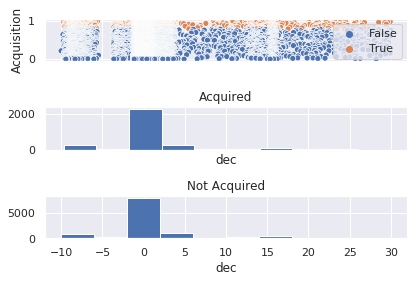

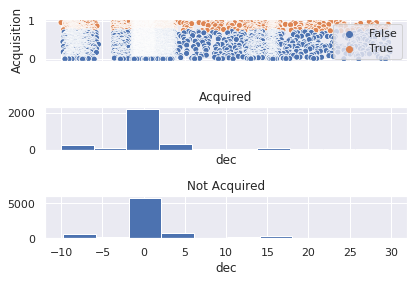

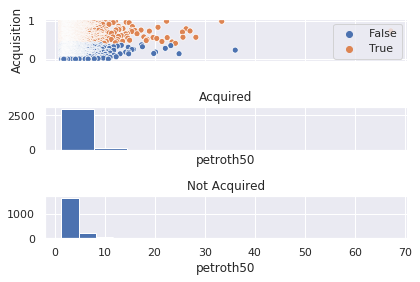

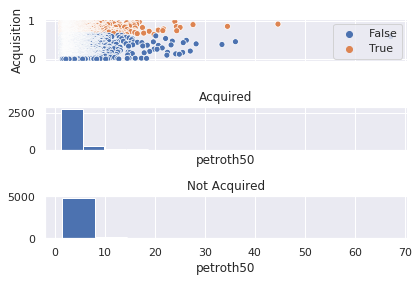

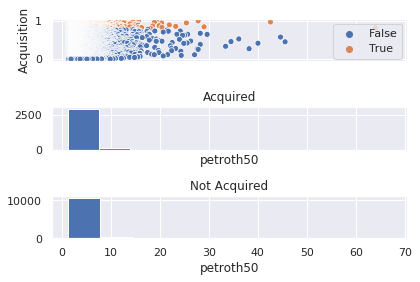

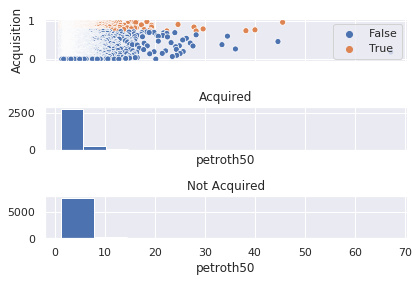

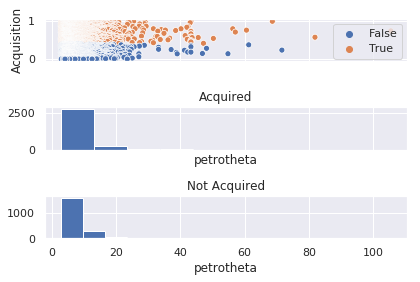

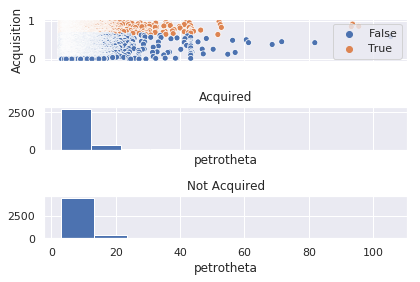

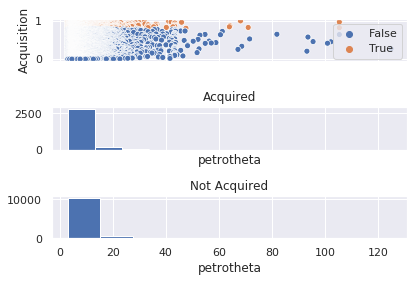

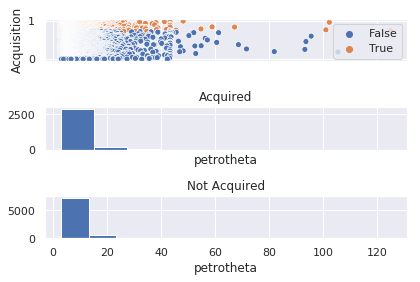

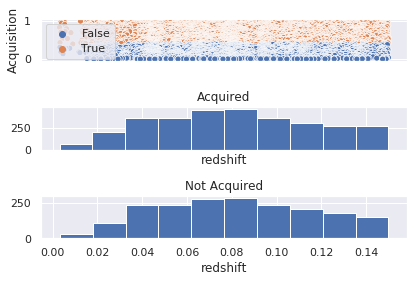

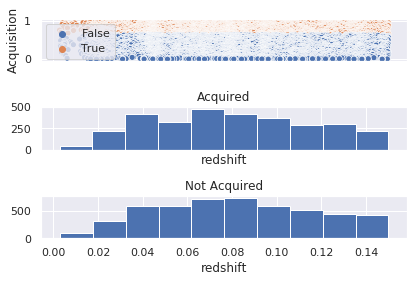

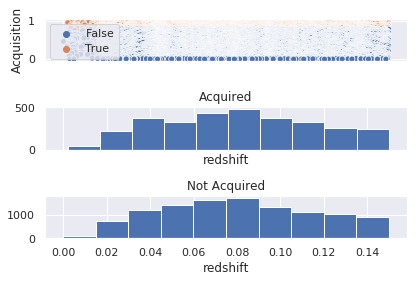

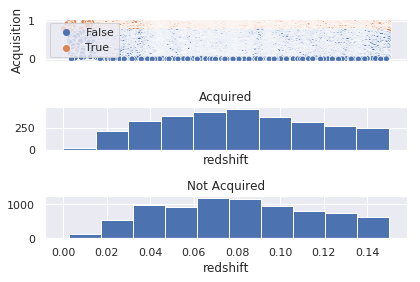

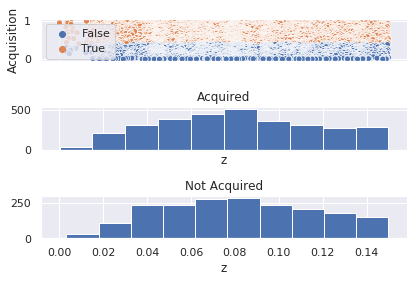

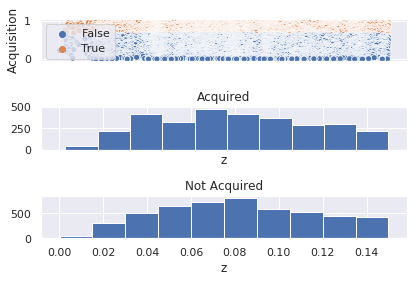

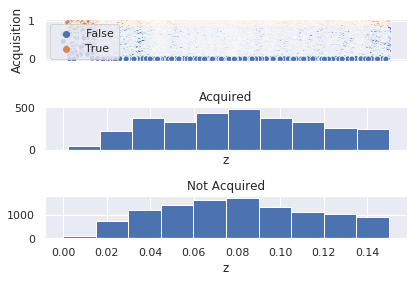

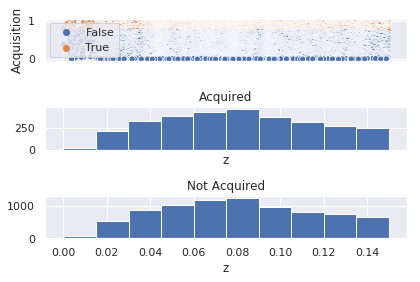

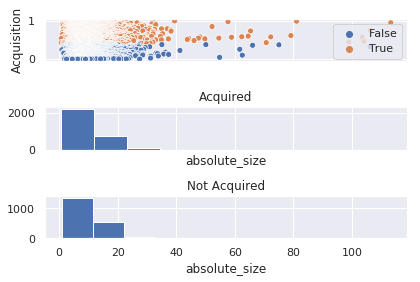

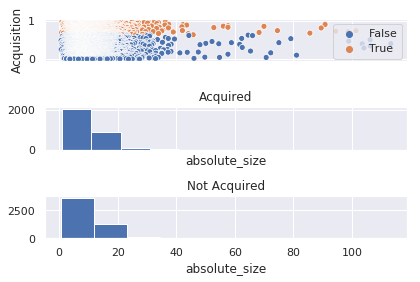

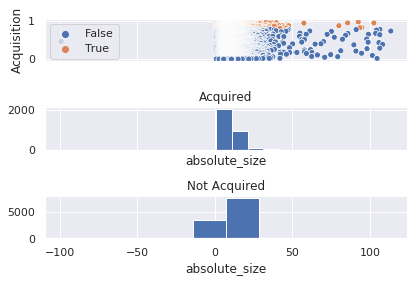

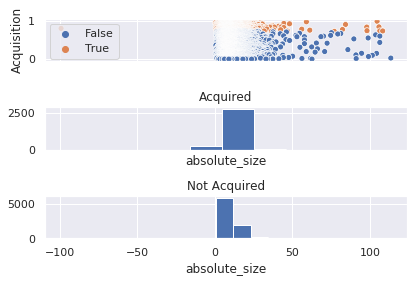

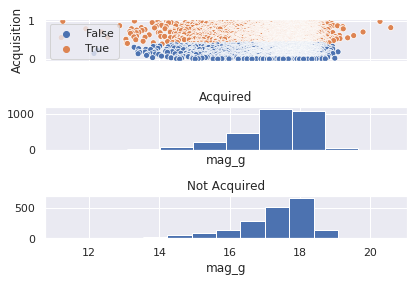

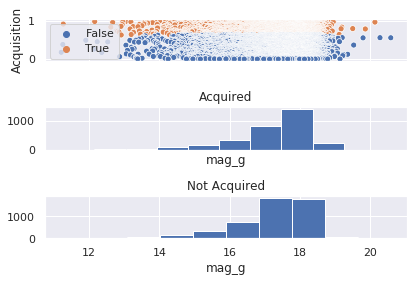

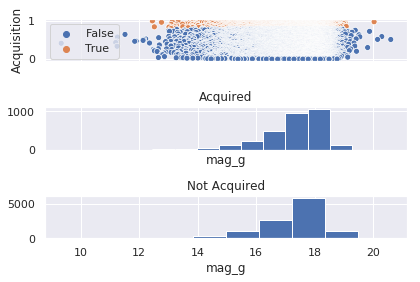

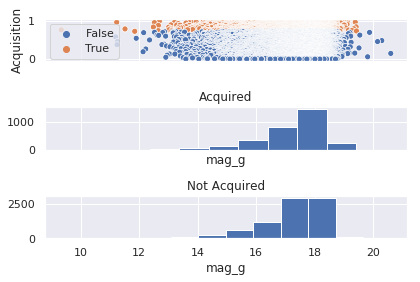

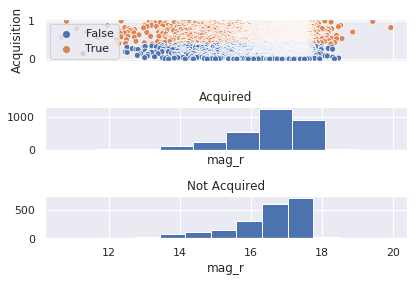

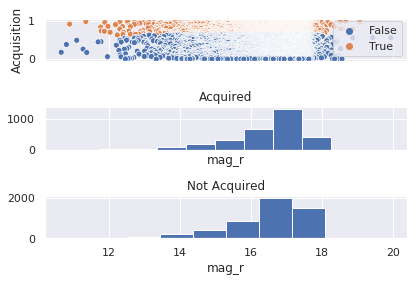

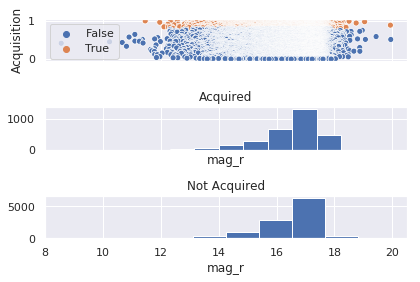

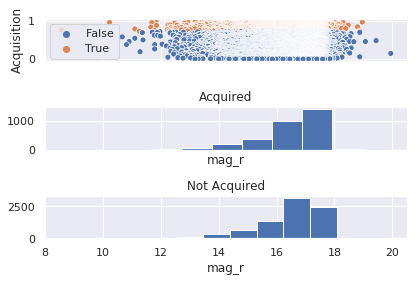

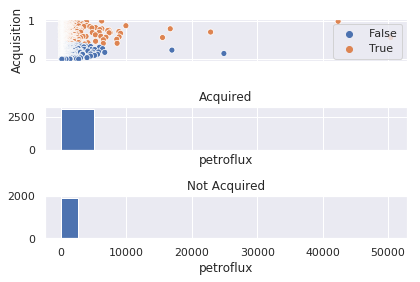

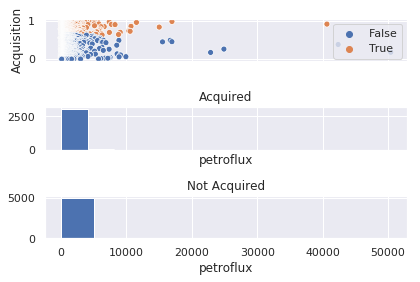

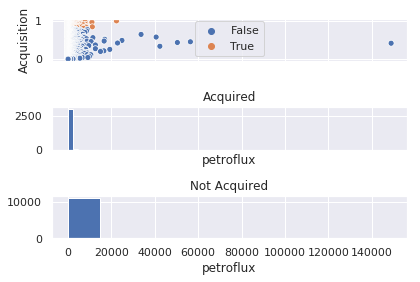

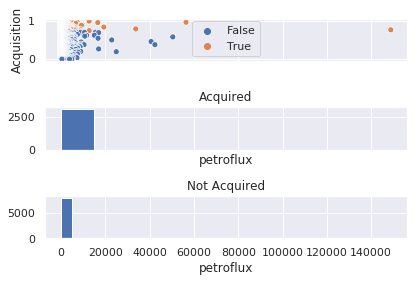

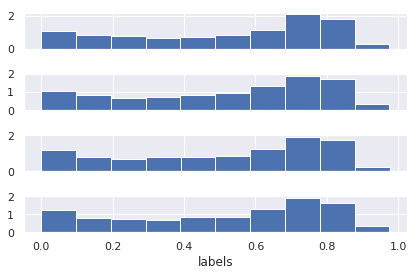

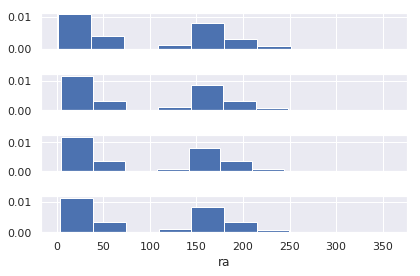

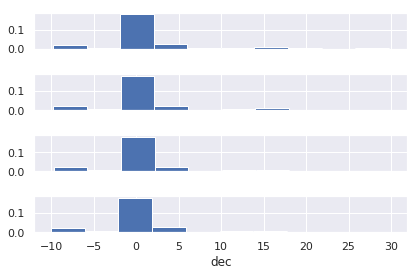

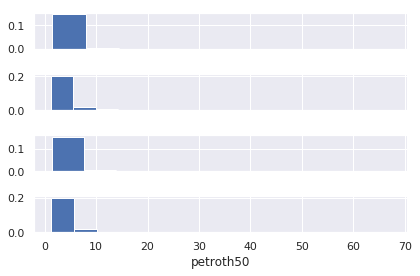

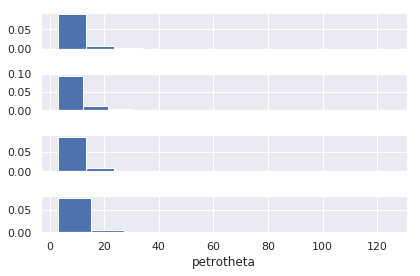

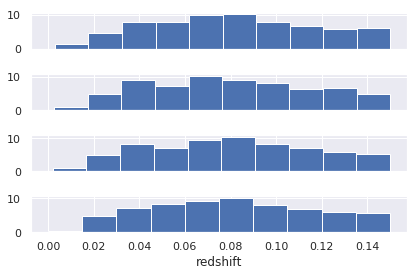

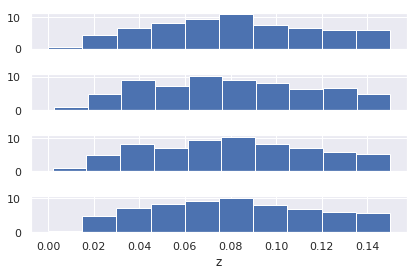

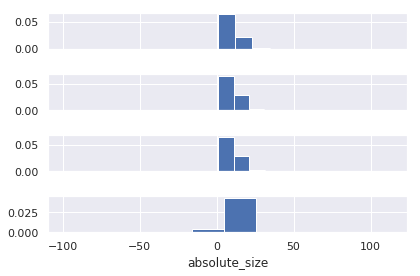

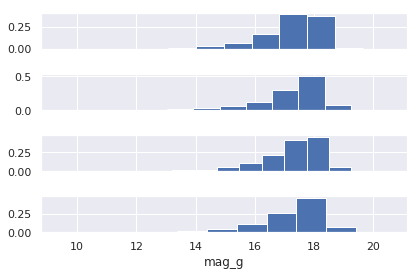

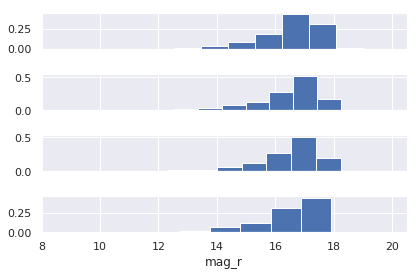

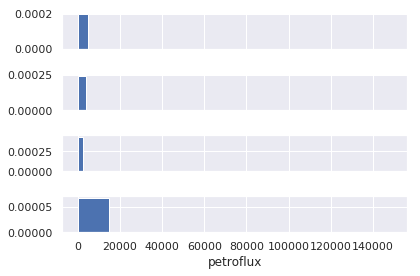

In [40]:
baseline_timeline.save_acquistion_comparison()
baseline_timeline.save_model_histograms()